**TRAINING ML AND RESULTS**

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Import csv

In [2]:
# Define function to read csv file into dataset
def read_csv_file(file): 
    dataset = pd.read_csv(file,header=0)
    return dataset

# Call funtion on file
#df = read_csv_file(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df_train.csv")
path = r"C:\Users\jmarsal\AppData\Local\anaconda3\Scripts\thesis\df_to_train.csv"
df = read_csv_file(path)

df.head()

,post_id,comment_id,comment_text,polarity,comment_train
0,A1,10001,🍸 firsts,neutral,🍸 first
1,A1,10004,nice,positive,nice
2,A1,10005,LIKE BACK,positive,LIKE BACK
3,A1,10006,❤ ️ ❤ ️ ❤ ️,strongly positive,❤ ️ ❤ ️ ❤ ️
4,A1,10010,🫣,neutral,🫣


**Split data and vectorize**

In [3]:
# Define polarities
list_polarity = ['strongly negative', 'negative','neutral','positive','strongly positive']
dict_pol = {'strongly negative': 1, 'negative': 2, 'neutral': 3, 'positive': 4, 'strongly positive': 5}

# Split into training and testing data
x = df['comment_train'].values.astype('U')
y = df['polarity']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.20, random_state=42)

BoW text vectorizer

In [4]:
# Vectorize text to numbers
vec = CountVectorizer(analyzer = 'char', binary = True)
x = vec.fit_transform(x).toarray()
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

**NB**

In [5]:
# Train and time NB
model_nb = MultinomialNB() 

start_time = time.time()

model_nb.fit(x_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print("Training time", elapsed_time)

Training time 1.6837127208709717


In [6]:
# Evaluate NB and time testing
start_time = time.time()

y_pred = model_nb.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(classification_report(y_test, y_pred, target_names = list_polarity), elapsed_time)

                   precision    recall  f1-score   support

strongly negative       0.46      0.08      0.14       264
         negative       0.39      0.62      0.48       989
          neutral       0.28      0.12      0.17       744
         positive       0.70      0.19      0.30       193
strongly positive       0.76      0.81      0.78      2814

         accuracy                           0.61      5004
        macro avg       0.52      0.37      0.38      5004
     weighted avg       0.60      0.61      0.58      5004
 0.5080690383911133


**SVM**

In [7]:
# Train and time SVM
model_svm = SVC(kernel='linear')

start_time = time.time()

model_svm.fit(x_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print("Training time", elapsed_time)

Training time 271.43961000442505


In [8]:
# Evaluate SVM and test time
start_time = time.time()

y_pred = model_svm.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(classification_report(y_test, y_pred, target_names = list_polarity), elapsed_time)

                   precision    recall  f1-score   support

strongly negative       0.35      0.09      0.14       264
         negative       0.52      0.80      0.63       989
          neutral       0.38      0.04      0.07       744
         positive       0.61      0.24      0.34       193
strongly positive       0.78      0.91      0.84      2814

         accuracy                           0.69      5004
        macro avg       0.53      0.41      0.41      5004
     weighted avg       0.64      0.69      0.63      5004
 39.89862036705017


**RF**

In [9]:
# Train and time RF
model_rf = RandomForestClassifier() 

start_time = time.time()

model_rf.fit(x_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print("Training time", elapsed_time)

Training time 21.417954444885254


In [10]:
# Evaluate RF and test time
start_time = time.time()

y_pred = model_rf.predict(x_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(classification_report(y_test, y_pred, target_names = list_polarity), elapsed_time)

                   precision    recall  f1-score   support

strongly negative       0.28      0.06      0.10       264
         negative       0.62      0.71      0.66       989
          neutral       0.42      0.28      0.33       744
         positive       0.50      0.17      0.25       193
strongly positive       0.79      0.91      0.84      2814

         accuracy                           0.70      5004
        macro avg       0.52      0.43      0.44      5004
     weighted avg       0.66      0.70      0.67      5004
 0.4260900020599365


Text(33.222222222222214, 0.5, 'Actual label')

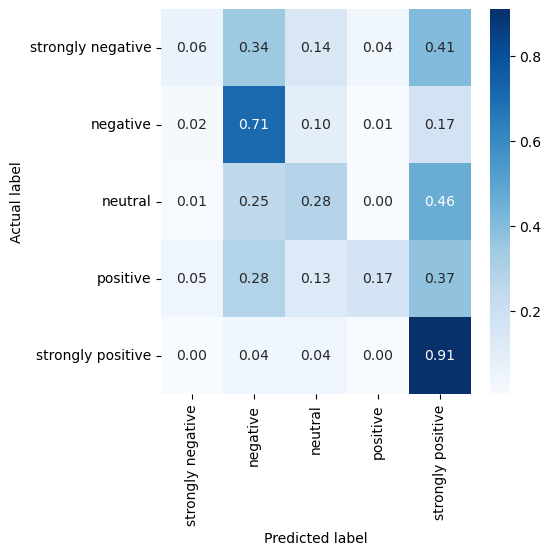

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize = (5,5))

sns.heatmap(cm,cmap= "Blues", 
            annot = True, 
            fmt='.2f', 
            xticklabels = list_polarity, 
            yticklabels = list_polarity)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")